<a href="https://colab.research.google.com/github/drmistretta/ACRD/blob/main/Navigator_MistrettaImageClassification_Generated_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2022 AIClub

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated
documentation files (the "Software"), to deal in the Software without restriction, including without
limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of
the Software, and to permit persons to whom the Software is furnished to do so, subject to the following
conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial
portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO
EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN
AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE
OR OTHER DEALINGS IN THE SOFTWARE.

Follow our courses - https://www.corp.aiclub.world/courses



In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

# The drive location of your folder which included subfolders for images

PATH = '/content/drive/My Drive/ACRD/Butterfly/35ButterflyCategories'


In [ ]:
def create_model(base_model, num_classes):
    import tensorflow as tf
    # Grab the last layer and add a few extra layers to it
    x=base_model.output
    x=GlobalAveragePooling2D()(x)
    # Dense layer 1
    x=tf.keras.layers.Dense(100,activation='relu', kernel_initializer=tf.keras.initializers.VarianceScaling(), use_bias=True)(x)

    # Final layer with softmax activation
    preds=tf.keras.layers.Dense(num_classes,activation='softmax', kernel_initializer=tf.keras.initializers.VarianceScaling(), use_bias=False)(x)

    # Create the final model
    model=Model(inputs=base_model.input,outputs=preds)
    return model


In [ ]:
def get_optimizer(optimizer_name, learning_rate):
    # Import keras optimizers
    from tensorflow.keras.optimizers import Adam, Adadelta, Adagrad, Adamax, Ftrl, Nadam, RMSprop, SGD
    print('Selected Optimizer', optimizer_name)
    switcher = {
        'Adadelta': Adadelta(learning_rate=learning_rate),
        'Adagrad': Adagrad(learning_rate=learning_rate),
        'Adam': Adam(learning_rate=learning_rate),
        'Adamax': Adamax(learning_rate=learning_rate),
        'FTRL': Ftrl(learning_rate=learning_rate),
        'NAdam': Nadam(learning_rate=learning_rate),
        'RMSprop': RMSprop(learning_rate=learning_rate),
        'Gradient Descent': SGD(learning_rate=learning_rate)
    }
    # If optimizer_name is empty, Adam will be return as default optimizer
    return switcher.get(optimizer_name, Adam(learning_rate=learning_rate))


In [ ]:

# Import packages needed to create an image classification model
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,GlobalAveragePooling2D
from keras.models import Model
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.callbacks import EarlyStopping


# Initialize hyper params
epochs = 20 #<-- increase for higher accuracy
base_learning_rate = 0.0001 #decrease for different results; use excel sheet to note down results from each change to learning rate and epochs
optimizer = 'Adam'
BATCH_SIZE = 32

IMG_SIZE = (224, 224)

# Create the data generation pipeline for training and validation
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(PATH,
                                                target_size=IMG_SIZE,
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset = 'training')
validation_generator = train_datagen.flow_from_directory(PATH,
                                                target_size=IMG_SIZE,
                                                color_mode='rgb',
                                                batch_size=BATCH_SIZE,
                                                class_mode='categorical',
                                                shuffle=True,
                                                subset = 'validation')

# Download the model, valid alpha values [0.25,0.35,0.5,0.75,1]
base_model = tf.keras.applications.mobilenet_v2.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet', alpha=0.35)
for layer in base_model.layers:
    layer.trainable=False

# Specify the number of classes
num_classes = 35

# Create the base model
model = create_model(base_model,num_classes)

print(len(base_model.layers))

model.compile(optimizer = get_optimizer(optimizer_name=optimizer,learning_rate=base_learning_rate),loss='CategoricalCrossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=30,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

step_size_train = train_generator.n//train_generator.batch_size
history_fine = model.fit(train_generator,
                        epochs=epochs,
                        callbacks=[early_stopping_monitor],
                        validation_data = validation_generator,
                        verbose=1)


Found 2415 images belonging to 35 classes.
Found 588 images belonging to 35 classes.
2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
154
Selected Optimizer Adam


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 653s 8s/step - accuracy: 0.0886 - loss: 3.4483 - val_accuracy: 0.3997 - val_loss: 2.8752
Epoch 2/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.5053 - loss: 2.6345 - val_accuracy: 0.6735 - val_loss: 2.0468
Epoch 3/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 156ms/step - accuracy: 0.7358 - loss: 1.8568 - val_accuracy: 0.7959 - val_loss: 1.4533
Epoch 4/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 153ms/step - accuracy: 0.8201 - loss: 1.3134 - val_accuracy: 0.8486 - val_loss: 1.0923
Epoch 5/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 153ms/step - accuracy: 0.8669 - loss: 0.9519 - val_accuracy: 0.8741 - val_loss: 0.8653
Epoch 6/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 155ms/step - accuracy: 0.8932 - loss: 0.7456 - val_accuracy: 0.8861 - val_loss: 0.7248
Epoch 7/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - accuracy: 0.9148 - loss: 0.6225 - val_accuracy: 0.8929 - val_loss: 0.6195
Epoch 8/20
76/76 ━━━━━━━━━━━━━━━━━━━━ 20s 155ms/step - accuracy: 0.9188 - loss: 0.5147 - val_accura

In [ ]:

# Import numpy for calculating best model accuracy
import numpy as np
# Populating matrics -> accuracy & loss
acc = history_fine.history['accuracy']
val_acc = history_fine.history['val_accuracy']

loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']

print('Training Accuracy: ', acc)
print('Validation Accuracy: ', val_acc)
print('Training Loss: ', loss)
print('Validation Loss: ', val_loss)
best_model_accuracy = history_fine.history['val_accuracy'][np.argmin(history_fine.history['val_loss'])]
print('best model accuracy: ', best_model_accuracy)

# Save the model after training
model.save("/content/drive/My Drive/ACRD/Butterfly/best_model_saved.h5")
print("Model saved as best_model_saved.h5")

Training Accuracy:  [0.1755693554878235, 0.5681159496307373, 0.7643892168998718, 0.8376811742782593, 0.8687370419502258, 0.8894410133361816, 0.9113871455192566, 0.925051748752594, 0.9304347634315491, 0.9420289993286133, 0.9507246613502502, 0.9594202637672424, 0.9614906907081604, 0.9689440727233887, 0.9722567200660706, 0.977225661277771, 0.9801242351531982, 0.9821946024894714, 0.984679102897644, 0.9855072498321533]
Validation Accuracy:  [0.3996598720550537, 0.6734693646430969, 0.795918345451355, 0.8486394286155701, 0.8741496801376343, 0.8860543966293335, 0.8928571343421936, 0.9047619104385376, 0.9064626097679138, 0.9115646481513977, 0.9234693646430969, 0.9234693646430969, 0.9217687249183655, 0.9217687249183655, 0.9268707633018494, 0.9251700639724731, 0.9387755393981934, 0.9336734414100647, 0.9387755393981934, 0.9336734414100647]
Training Loss:  [3.2742326259613037, 2.447049856185913, 1.7033846378326416, 1.2155731916427612, 0.913307249546051, 0.7225955724716187, 0.594373345375061, 0.5016

In [ ]:
def seperate_labels(generator):
    x_validation = []
    y_validation = []
    num_seen = 0

    for x, labels in generator:
        x_validation.append(x)
        y_validation.append([argmax(label) for label in labels])
        num_seen += len(x)
        if num_seen == generator.n: break

    x_validation = np.concatenate(x_validation)
    y_validation = np.concatenate(y_validation)
    return x_validation, y_validation


19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step


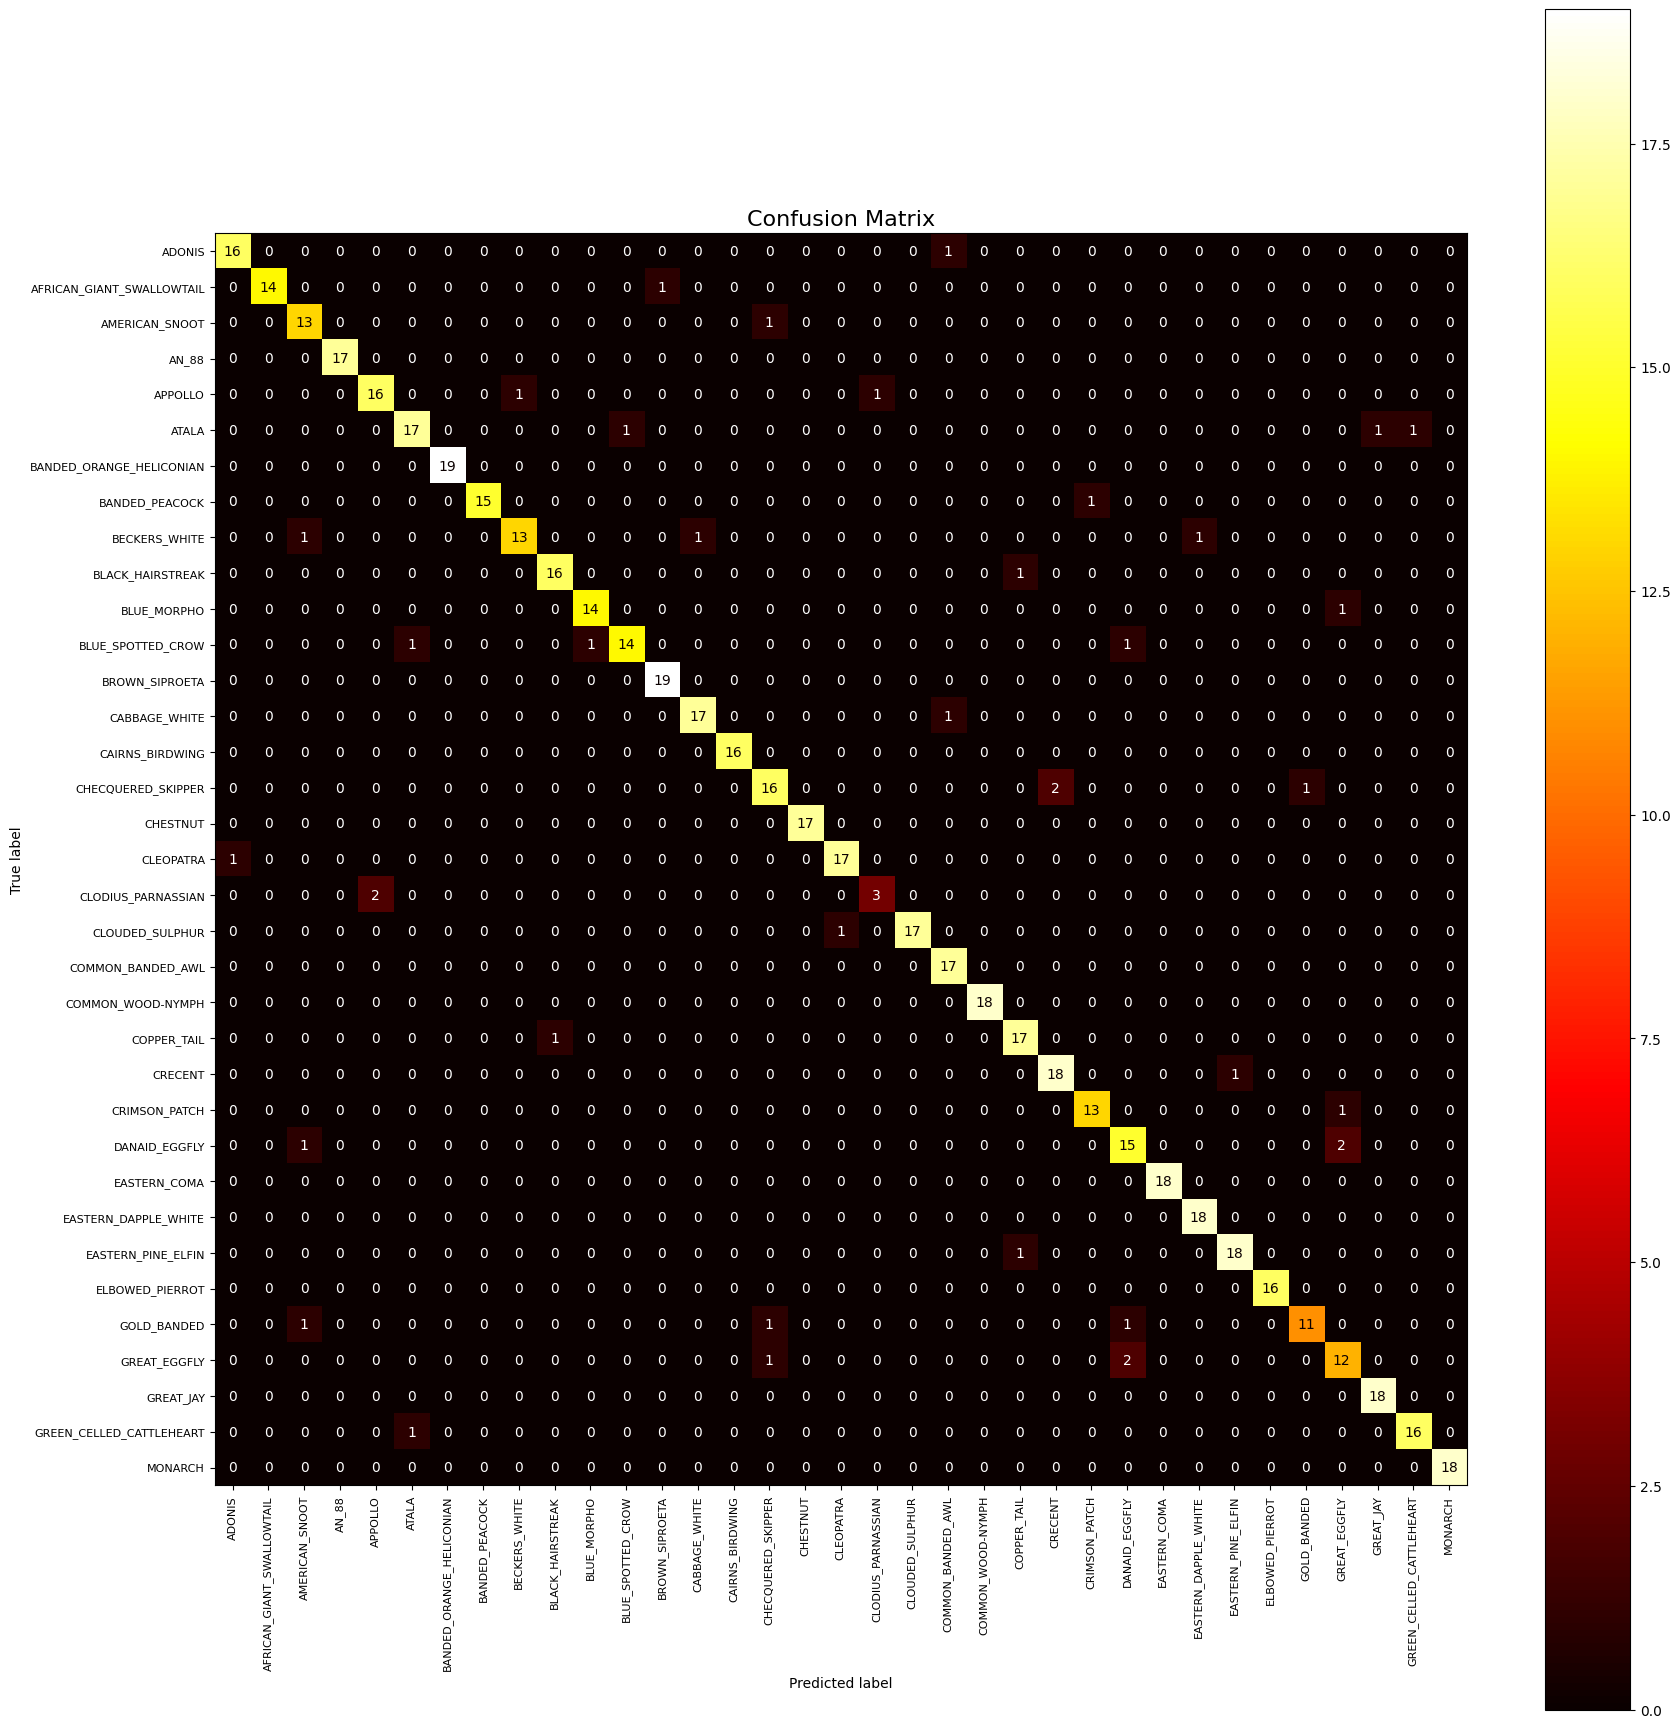

In [ ]:

# Calculate and display the confusion matrix
import matplotlib.pyplot as plt
from numpy._core.fromnumeric import argmax
from sklearn.metrics import ConfusionMatrixDisplay

x_validation, y_validation = seperate_labels(validation_generator)
y_pred = model.predict(x_validation, batch_size=BATCH_SIZE)
predictions = np.apply_along_axis(argmax, 1, y_pred)

# Get display labels
display_labels = list (validation_generator.class_indices.keys())

# Create display object
disp = ConfusionMatrixDisplay.from_predictions(
    y_validation,
    predictions,
    display_labels=display_labels,
    cmap='hot',
    xticks_rotation='vertical'  # Rotate x labels
)

# Improve spacing and font size
fig = plt.gcf()
fig.set_size_inches(18, 18)  # Increase figure size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.title("Confusion Matrix", fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
from tensorflow.keras.models import load_model
# Load the saved model
model = load_model("/content/drive/My Drive/ACRD/Butterfly/best_model_saved.h5")

# Predicting code for an image
from tensorflow.keras.preprocessing import image
# Please replace the brackets below with the location of your image which need to predict
img_path = '/content/drive/My Drive/ACRD/Butterfly/35ButterflyCategories/AN_88/Image_321.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)
prediction = model.predict(img_preprocessed)

# Step 1: Get the index of the highest predicted probability
predicted_index = np.argmax(prediction)

# Step 2: Map index to label
# validation_generator.class_indices maps labels to indices, so reverse it:
index_to_label = {v: k for k, v in validation_generator.class_indices.items()}
predicted_label = index_to_label[predicted_index]

# Step 3: Print the result
print(f"\nPredicted category: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

Predicted category: AN_88
